# R et C++, c'est possible

In [ ]:
library(Rcpp)
library(inline)

cppFunction('
double crossprodC(NumericVector x, NumericVector y){
 double crp = 0.;
 int n = x.size();
 for(int i=0; i<n; i++) crp += x[i]*y[i];
 return(crp);
}
')

crossprodC

In [ ]:
crossprodC(c(1.5,6.3), c(0.3,4.3))

In [8]:
library(deSolve)
source("ODEsim_init.R")

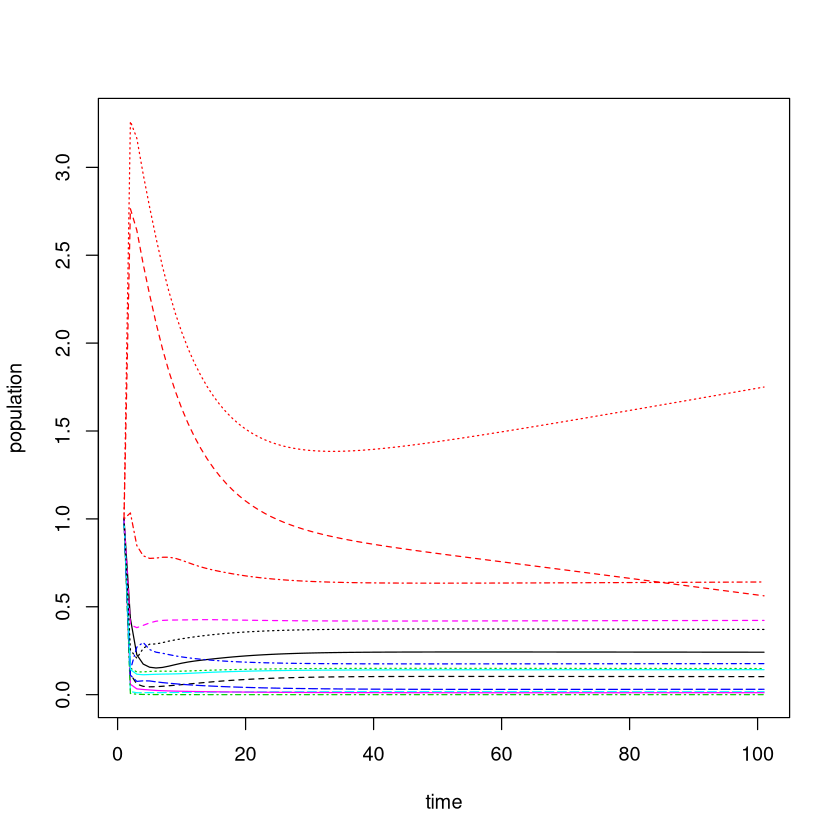

In [7]:
output <-as.data.frame(
        ode(func = foodwebmodC, y = State, parms = Pars, times = Time)
    )
matplot(output[,-1], type = "l", xlab = "time", ylab = "population")

# Monitorer le temps de calcul

In [1]:
x <- runif(100)
system.time( for(i in 1:100){sqrt(x)} )

   user  system elapsed 
  0.003   0.000   0.003 

In [2]:
system.time( for(i in 1:1e5){x^(1./2.)} )[3] # temps écoulé

elapsed 
  0.647

In [3]:
library(microbenchmark)
print(microbenchmark( 
    sqrt(x), 
    x^(1./2.), 
    times = 1e5))

Unit: microseconds
    expr   min    lq     mean median    uq       max neval
 sqrt(x) 1.115 1.239 1.640719  1.360 1.424 10317.364 1e+05
 x^(1/2) 6.057 6.236 7.220149  7.069 7.138  8210.225 1e+05


In [4]:
x=9
system.time( sqrt(x) )[3]

elapsed 
      0

In [5]:
print(microbenchmark(
 sqrt(x),
 x^0.5,
 x^(1./2.),
 exp(log(x)/2)
))

Unit: nanoseconds
          expr min    lq   mean median  uq  max neval
       sqrt(x) 159 194.0 267.79  211.0 225 5986   100
         x^0.5 278 309.0 363.31  323.0 345 3213   100
       x^(1/2) 485 519.5 567.01  543.5 569 1337   100
 exp(log(x)/2) 409 471.0 597.79  496.5 517 9945   100


# Profilage de code

In [8]:
is.prime <- function(n) n == 2L || 
                        all(n %% 2L:ceiling(sqrt(n)) != 0)
all.prime <- function(n){
    v <- integer(0)
    for(i in 2:n) if(is.prime(i)) v <- c(v,i)
    v
}

Rprof("BIGFILE.out", interval = 0.001)
prime.numbers <- all.prime(1e5)
Rprof(NULL)
summaryRprof("BIGFILE.out")
#prime.numbers
prime.numbers

$by.self
              self.time self.pct total.time total.pct
"%%"              0.083    35.62      0.083     35.62
"is.prime"        0.066    28.33      0.164     70.39
"c"               0.047    20.17      0.047     20.17
"all.prime"       0.020     8.58      0.233    100.00
"all"             0.013     5.58      0.013      5.58
"putconst"        0.002     0.86      0.002      0.86
"cb$putlabel"     0.001     0.43      0.001      0.43
"exists"          0.001     0.43      0.001      0.43

$by.total
                       total.time total.pct self.time self.pct
"all.prime"                 0.233    100.00     0.020     8.58
"doTryCatch"                0.233    100.00     0.000     0.00
"eval"                      0.233    100.00     0.000     0.00
"evaluate_call"             0.233    100.00     0.000     0.00
"evaluate"                  0.233    100.00     0.000     0.00
"executor$execute"          0.233    100.00     0.000     0.00
"handle_shell"              0.233    100.00     0.000     0.00
"handle"                    0.233    100.00     0.000     0.00
"IRkernel::main"            0.233    100.00     0.000     0.00
"kernel$run"                0.233    100.00     0.000     0.00
"timing_fn"                 0.233    100.00     0.000     0.00
"try"                       0.233    100.00     0.000     0.00
"tryCatch"                  0.233    100.00     0.000     0.00
"tryCatchList"              0.233    100.00     0.000     0.00
"tryCatchOne"               0.233    100.00     0.000     0.00
"withCallingHandlers"       0.233    100.00     0.000     0.00
"withVisible"               0.233    100.00     0.000     0.00
"is.prime"                  0.164     70.39     0.066    28.33
"%%"                        0.083     35.62     0.083    35.62
"c"                         0.047     20.17     0.047    20.17
"all"                       0.013      5.58     0.013     5.58
"cmp"                       0.004      1.72     0.000     0.00
"cmpCall"                   0.004      1.72     0.000     0.00
"cmpfun"                    0.004      1.72     0.000     0.00
"compiler:::tryCmpfun"      0.004      1.72     0.000     0.00
"genCode"                   0.004      1.72     0.000     0.00
"h"                         0.004      1.72     0.000     0.00
"tryInline"                 0.004      1.72     0.000     0.00
"putconst"                  0.002      0.86     0.002     0.86
"cb$putcode"                0.002      0.86     0.000     0.00
"cmpBuiltinArgs"            0.002      0.86     0.000     0.00
"cmpPrim2"                  0.002      0.86     0.000     0.00
"cmpSymbolAssign"           0.002      0.86     0.000     0.00
"cb$putlabel"               0.001      0.43     0.001     0.43
"exists"                    0.001      0.43     0.001     0.43
"cmpCallArgs"               0.001      0.43     0.000     0.00
"cmpCallSymFun"             0.001      0.43     0.000     0.00
"cmpConst"                  0.001      0.43     0.000     0.00
"cmpConstArg"               0.001      0.43     0.000     0.00
"cmpForBody"                0.001      0.43     0.000     0.00
"cmpSym"                    0.001      0.43     0.000     0.00
"findCenvVar"               0.001      0.43     0.000     0.00
"findVar"                   0.001      0.43     0.000     0.00

$sample.interval
[1] 0.001

$sampling.time
[1] 0.233

[1]     2     3     5     7    11    13    17    19    23    29    31    37
  [13]    41    43    47    53    59    61    67    71    73    79    83    89
  [25]    97   101   103   107   109   113   127   131   137   139   149   151
  [37]   157   163   167   173   179   181   191   193   197   199   211   223
  [49]   227   229   233   239   241   251   257   263   269   271   277   281
  [61]   283   293   307   311   313   317   331   337   347   349   353   359
  [73]   367   373   379   383   389   397   401   409   419   421   431   433
  [85]   439   443   449   457   461   463   467   479   487   491   499   503
  [97]   509   521   523   541   547   557   563   569   571   577   587   593
 [109]   599   601   607   613   617   619   631   641   643   647   653   659
 [121]   661   673   677   683   691   701   709   719   727   733   739   743
 [133]   751   757   761   769   773   787   797   809   811   821   823   827
 [145]   829   839   853   857   859   863   877   881   883   887   907   911
 [157]   919   929   937   941   947   953   967   971   977   983   991   997
 [169]  1009  1013  1019  1021  1031  1033  1039  1049  1051  1061  1063  1069
 [181]  1087  1091  1093  1097  1103  1109  1117  1123  1129  1151  1153  1163
 [193]  1171  1181  1187  1193  1201  1213  1217  1223  1229  1231  1237  1249
 [205]  1259  1277  1279  1283  1289  1291  1297  1301  1303  1307  1319  1321
 [217]  1327  1361  1367  1373  1381  1399  1409  1423  1427  1429  1433  1439
 [229]  1447  1451  1453  1459  1471  1481  1483  1487  1489  1493  1499  1511
 [241]  1523  1531  1543  1549  1553  1559  1567  1571  1579  1583  1597  1601
 [253]  1607  1609  1613  1619  1621  1627  1637  1657  1663  1667  1669  1693
 [265]  1697  1699  1709  1721  1723  1733  1741  1747  1753  1759  1777  1783
 [277]  1787  1789  1801  1811  1823  1831  1847  1861  1867  1871  1873  1877
 [289]  1879  1889  1901  1907  1913  1931  1933  1949  1951  1973  1979  1987
 [301]  1993  1997  1999  2003  2011  2017  2027  2029  2039  2053  2063  2069
 [313]  2081  2083  2087  2089  2099  2111  2113  2129  2131  2137  2141  2143
 [325]  2153  2161  2179  2203  2207  2213  2221  2237  2239  2243  2251  2267
 [337]  2269  2273  2281  2287  2293  2297  2309  2311  2333  2339  2341  2347
 [349]  2351  2357  2371  2377  2381  2383  2389  2393  2399  2411  2417  2423
 [361]  2437  2441  2447  2459  2467  2473  2477  2503  2521  2531  2539  2543
 [373]  2549  2551  2557  2579  2591  2593  2609  2617  2621  2633  2647  2657
 [385]  2659  2663  2671  2677  2683  2687  2689  2693  2699  2707  2711  2713
 [397]  2719  2729  2731  2741  2749  2753  2767  2777  2789  2791  2797  2801
 [409]  2803  2819  2833  2837  2843  2851  2857  2861  2879  2887  2897  2903
 [421]  2909  2917  2927  2939  2953  2957  2963  2969  2971  2999  3001  3011
 [433]  3019  3023  3037  3041  3049  3061  3067  3079  3083  3089  3109  3119
 [445]  3121  3137  3163  3167  3169  3181  3187  3191  3203  3209  3217  3221
 [457]  3229  3251  3253  3257  3259  3271  3299  3301  3307  3313  3319  3323
 [469]  3329  3331  3343  3347  3359  3361  3371  3373  3389  3391  3407  3413
 [481]  3433  3449  3457  3461  3463  3467  3469  3491  3499  3511  3517  3527
 [493]  3529  3533  3539  3541  3547  3557  3559  3571  3581  3583  3593  3607
 [505]  3613  3617  3623  3631  3637  3643  3659  3671  3673  3677  3691  3697
 [517]  3701  3709  3719  3727  3733  3739  3761  3767  3769  3779  3793  3797
 [529]  3803  3821  3823  3833  3847  3851  3853  3863  3877  3881  3889  3907
 [541]  3911  3917  3919  3923  3929  3931  3943  3947  3967  3989  4001  4003
 [553]  4007  4013  4019  4021  4027  4049  4051  4057  4073  4079  4091  4093
 [565]  4099  4111  4127  4129  4133  4139  4153  4157  4159  4177  4201  4211
 [577]  4217  4219  4229  4231  4241  4243  4253  4259  4261  4271  4273  4283
 [589]  4289  4297  4327  4337  4339  4349  4357  4363  4373  4391  4397  4409
 [601]  4421  4423  4441  4447  4451  4457  4463  448

In [9]:
is.prime <- function(n) n == 2L || 
                        all(n %% 2L:ceiling(sqrt(n)) != 0)
all.prime <- function(n){
    v <- rep(0L, 0.5*n*log(n))
    iprime <- 1
    for(i in 2:n) if(is.prime(i)){ 
        v[iprime] <- i
        iprime <- iprime+1
    }
    v
}

Rprof("Rprof.out", interval = 0.001)
prime.numbers <- all.prime(1e5)
Rprof(NULL)
summaryRprof("Rprof.out")

$by.self
                     self.time self.pct total.time total.pct
"is.prime"               0.088    42.93      0.181     88.29
"%%"                     0.078    38.05      0.078     38.05
"all.prime"              0.016     7.80      0.204     99.51
"all"                    0.013     6.34      0.013      6.34
"cmpCallArgs"            0.003     1.46      0.003      1.46
"%in%"                   0.001     0.49      0.001      0.49
"as.list"                0.001     0.49      0.001      0.49
"cb$putcode"             0.001     0.49      0.001      0.49
"get"                    0.001     0.49      0.001      0.49
"lapply"                 0.001     0.49      0.001      0.49
"match.arg"              0.001     0.49      0.001      0.49
"mayCallBrowserList"     0.001     0.49      0.001      0.49

$by.total
                         total.time total.pct self.time self.pct
"doTryCatch"                  0.205    100.00     0.000     0.00
"evaluate_call"               0.205    100.00     0.000     0.00
"evaluate"                    0.205    100.00     0.000     0.00
"executor$execute"            0.205    100.00     0.000     0.00
"handle_shell"                0.205    100.00     0.000     0.00
"IRkernel::main"              0.205    100.00     0.000     0.00
"kernel$run"                  0.205    100.00     0.000     0.00
"tryCatch"                    0.205    100.00     0.000     0.00
"tryCatchList"                0.205    100.00     0.000     0.00
"tryCatchOne"                 0.205    100.00     0.000     0.00
"all.prime"                   0.204     99.51     0.016     7.80
"eval"                        0.204     99.51     0.000     0.00
"handle"                      0.204     99.51     0.000     0.00
"timing_fn"                   0.204     99.51     0.000     0.00
"try"                         0.204     99.51     0.000     0.00
"withCallingHandlers"         0.204     99.51     0.000     0.00
"withVisible"                 0.204     99.51     0.000     0.00
"is.prime"                    0.181     88.29     0.088    42.93
"%%"                          0.078     38.05     0.078    38.05
"all"                         0.013      6.34     0.013     6.34
"cmpfun"                      0.009      4.39     0.000     0.00
"compiler:::tryCmpfun"        0.009      4.39     0.000     0.00
"cmp"                         0.007      3.41     0.000     0.00
"cmpCall"                     0.007      3.41     0.000     0.00
"genCode"                     0.007      3.41     0.000     0.00
"h"                           0.007      3.41     0.000     0.00
"tryInline"                   0.007      3.41     0.000     0.00
"cmpForBody"                  0.004      1.95     0.000     0.00
"cmpCallArgs"                 0.003      1.46     0.003     1.46
"cmpCallSymFun"               0.003      1.46     0.000     0.00
"%in%"                        0.001      0.49     0.001     0.49
"as.list"                     0.001      0.49     0.001     0.49
"cb$putcode"                  0.001      0.49     0.001     0.49
"get"                         0.001      0.49     0.001     0.49
"lapply"                      0.001      0.49     0.001     0.49
"match.arg"                   0.001      0.49     0.001     0.49
"mayCallBrowserList"          0.001      0.49     0.001     0.49
"checkSkipLoopCntxt"          0.001      0.49     0.000     0.00
"checkSkipLoopCntxtList"      0.001      0.49     0.000     0.00
"cmpBuiltinArgs"              0.001      0.49     0.000     0.00
"cmpPrim2"                    0.001      0.49     0.000     0.00
"constantFold"                0.001      0.49     0.000     0.00
"constantFoldCall"            0.001      0.49     0.000     0.00
"findLocalsList"              0.001      0.49     0.000     0.00
"findLocalsList1"             0.001      0.49     0.000     0.00
"FUN"                         0.001      0.49     0.000     0.00
"funEnv"                      0.001      0.49     0.000     0.00
"getInlineHandler"            0.001      0.49     0.000     0.00
"m

# Monitorer la mémoire

In [ ]:
library(pryr)
v <- 1:1e8 # vecteur d'entier
object_size(v)

In [ ]:
v[1]<-0 # au lieu de 0L => conversion en réel signalée par tracemem

object_size(v)

# Fonctions vectorisées

In [ ]:
library(microbenchmark)
myRowSums <- function(mat){
    sums <- rep(0,nrow(mat))
    for (i in 1:nrow(mat))
      for (j in 1:ncol(mat))
        sums[i] <- sums[i] + mat[i,j]
    sums
}

mat = matrix(rnorm(1e3*1e3),1e3,1e3)
print(microbenchmark(
    myRowSums(mat),
    apply(mat,1,sum),
    rowSums(mat),
    times=10
))

# Préallocation

In [ ]:
noprealloc <- function(n){
 result <- c()
 for (i in 1:n) result <- c(result,rnorm(1)) 
  result
}
withprealloc <- function(n){
 result <- double(n)  # préallocation de la mémoire
 for (i in 1:n) result[i] <- rnorm(1)
  result
}

print(microbenchmark(
 noprealloc(1e4),    
 withprealloc(1e4),
 times=10
))

# Travailler moins pour gagner plus

In [15]:
library(microbenchmark)
dtf <- data.frame(poids=rchisq(100000,10),
                  groupe=factor(sample(1:10,100000,rep=T)))
head(dtf)

poids     groupe
1  6.532394 10    
2 13.874001 6     
3 10.344934 6     
4 10.605930 3     
5 10.944044 7     
6  6.415523 10

In [16]:
# préallocation du résultat 
r <- data.frame(poids=1:10, mean=rep(0,10), sd=rep(0,10))

print(microbenchmark(
for(groupe in 1:10){
 tmp <- dtf$poids[dtf$groupe==groupe]
 r$mean[groupe] <- mean(tmp)
 r$sd[groupe] <- sd(tmp)
}, times=10))

Unit: milliseconds
                                                                                                                            expr
 for (groupe in 1:10) {     tmp <- dtf$poids[dtf$groupe == groupe]     r$mean[groupe] <- mean(tmp)     r$sd[groupe] <- sd(tmp) }
      min       lq     mean   median       uq      max neval
 48.14516 50.55871 51.82387 51.90455 54.10524 55.24052    10


In [17]:
print(microbenchmark(
 aggregate(poids ~ groupe, data=dtf, 
           FUN = function(x) c(mean=mean(x), sd=sd(x))), 
 times=10
))

Unit: milliseconds
                                                                                        expr
 aggregate(poids ~ groupe, data = dtf, FUN = function(x) c(mean = mean(x),      sd = sd(x)))
      min       lq     mean   median       uq      max neval
 114.2782 118.1654 119.9016 119.7044 122.6968 125.6177    10


In [18]:
library(plyr)
print(microbenchmark(
 ddply(dtf, ~groupe, summarise, mean=mean(poids),sd=sd(poids)), 
 times=10
))

Unit: milliseconds
                                                               expr      min
 ddply(dtf, ~groupe, summarise, mean = mean(poids), sd = sd(poids)) 19.98361
       lq   mean   median       uq      max neval
 20.11223 20.817 20.20973 20.29133 26.53646    10


In [19]:
library(dplyr)
print(microbenchmark(
 dtf %>% group_by(groupe) %>% summarise(mean(poids),sd(poids)), 
 times=10
))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Unit: milliseconds
                                                           expr      min
 dtf %>% group_by(groupe) %>% summarise(mean(poids), sd(poids)) 5.155455
       lq     mean   median       uq      max neval
 5.353977 6.666846 5.400925 5.485001 18.26777    10


In [20]:
library(data.table)
dt <- data.table(dtf)
print(microbenchmark(
 dt[,list(mean=mean(poids),sd=sd(poids)),by=groupe], 
 times=10
))


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



Unit: milliseconds
                                                        expr      min       lq
 dt[, list(mean = mean(poids), sd = sd(poids)), by = groupe] 7.053964 7.408038
     mean   median       uq      max neval
 8.638075 7.702784 8.102595 17.32024    10


# Changer d'algorithme

In [10]:
all.ids <- sample(1e9, 1e7) # identifiants tirés au hasard
head(all.ids)

[1] 322355494 635645695 270170062 461503327 588797959 376508513

In [11]:
library(microbenchmark)
id <- sample(1e9,1)
print(microbenchmark( 
 id %in% all.ids,
 any(all.ids==id),
 times=25
))

Unit: milliseconds
               expr      min       lq     mean   median       uq      max neval
    id %in% all.ids 24.89053 25.12272 26.32856 25.76744 27.34881 29.94562    25
 any(all.ids == id) 58.16833 58.50067 61.38333 60.34160 62.87452 71.65232    25


In [12]:
system.time( all.ids.sorted <- sort(all.ids) )[3]

elapsed 
  0.941

In [ ]:
log(1e9)


In [14]:
library(gtools)
print(microbenchmark( 
 binsearch(fun=function(i) all.ids.sorted[i]-id, 
           range=c(1,length(all.ids.sorted)))
))

Unit: microseconds
                                                                                           expr
 binsearch(fun = function(i) all.ids.sorted[i] - id, range = c(1,      length(all.ids.sorted)))
    min     lq     mean  median      uq      max neval
 97.525 99.003 127.3648 99.7985 100.784 2696.979   100


In [ ]:
log(1e7)

# Interfacer R et C++

In [ ]:
sumR <- function(x){
    n <- length(x)
    total <- 0
    for(i in 1:n) total <- total+x[i]
    return(total)
}

In [ ]:
library(Rcpp)
library(inline)
cppFunction('
double sumC(NumericVector x) {
 int n = x.size();
 double total = 0;
 for(int i = 0; i < n; ++i) total += x[i];
 return total;
}
')

In [ ]:
sumC

In [ ]:
v <- runif(1e6)
library(microbenchmark)
print(microbenchmark(    
    sumR(v),
    sum(v),
    sumC(v),
    times=25
))

In [ ]:
sum

In [ ]:
library(inline)
library(Rcpp)

cppFunction('int sixtythree(){
 return(63);
}
')
sixtythree()
sixtythree

In [ ]:
cppFunction('double prodInC(double x, double y){
 return(x*y);
}
')
prodInC(1.5, 0.3)

In [ ]:
cppFunction('
double crossprodC(NumericVector x, NumericVector y){
 double crp = 0.;
 int n = x.size();
 for(int i=0; i<n; i++) crp += x[i]*y[i];
 return(crp);
}
')
crossprodC(c(1.5,6.3), c(0.3,4.3))

In [ ]:
cppFunction('
NumericMatrix subMatrix(LogicalVector x, NumericMatrix mat){
 int nr = mat.nrow(), nc = mat.ncol();
 if (x.size() != nr)  warning("Inconsistent dimensions");
 int nr2 = 0;
 for(int i=0; i<nr; i++) if(x[i]) nr2++;
 NumericMatrix mat2(nr2,nc);
 int i2 = 0;
 for(int i=0; i<nr; i++)
  if(x[i]){
   for(int j=0; j<nc; j++)
    mat2(i2,j) = mat(i,j);
   i2++;
  }
 return(mat2);
}
')
subMatrix(c(TRUE,FALSE,TRUE), rbind(c(1.,2),c(3.,4.),c(5.,6.)))

In [ ]:
cppFunction('
NumericVector matvecprod(NumericMatrix mat, NumericVector vec){
    int n = vec.size();
    NumericVector result(n);
    for(int i=0; i<n; i++){
        double sum=0.;
        for(int j=0; j<n; j++){
            sum += mat(i,j)*vec(j);
        }
        result[i] = sum;
    }
    return(result);
}')
matvecprod(matrix(runif(25),5,5), runif(5))